https://www.kaggle.com/randylaosat/hr-analytics-simple-visualizations

In [ ]:
# if any pdf
from IPython.display import IFrame
IFrame("Sk_Learn_Cheat_Sheet.pdf", width=2000, height=1000)

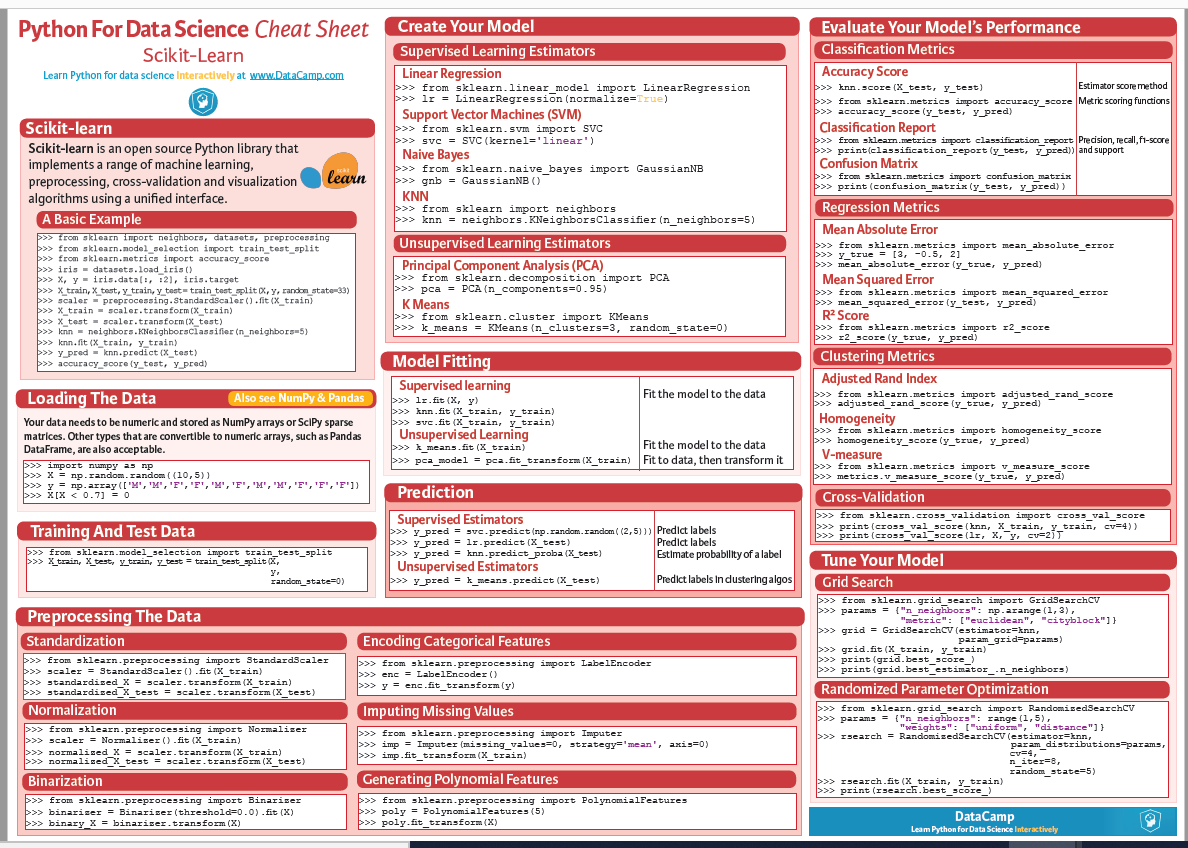

In [12]:
## This is for an `png` image
from IPython.display import Image

fig = Image(filename=('Sk_Learn_Cheat_Sheet.png'))
fig

In [ ]:
# Import the neccessary modules for data manipulation and visual representation
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Part 1: Obtaining the Data

In [ ]:
#Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.DataFrame.from_csv('HR_comma_sep.csv', index_col=None)

### Part 2: Scrubbing the Data

In [ ]:
# Check to see if there are any MISSING values in our data set
df.isnull().any()

In [ ]:
# Get a quick overview of what we are dealing with in our dataset
df.head()

In [ ]:
# RENAMING certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [ ]:
# ENCODING 
# Convert "department" and "salary" features to numeric types because some functions won't be able to work with string types
df['department'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management','IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)
df['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

df.head()

### Part 3 - Exploratory Data Analysis

In [ ]:
# The dataset contains -- columns and ----- observations
df.shape

In [ ]:
# Check the type of our features. 
df.dtypes

In [ ]:
# target ratio
# Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
# 14999 is no. of rows
turnover_rate = df.turnover.value_counts() / 14999
turnover_rate

In [ ]:
# Overview of summary
# On average, employees who left had a lower satisfaction level of -20%**, worked 8hours more per month, 
# had lower salary, and had a lower promotion rate
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

In [ ]:
# Display the statistical overview of the employees
df.describe()

In [ ]:
#Correlation Matrix and Heatmap
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

From the heatmap, there seems to be heavy positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly. But the feature evaluation, when compared independently with the response variable turnover, shows little to no relationship. What does this mean? For the negative(-) relationships, turnover, satisfaction, and salary are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied and are lowly paid.

### Part 4: Train-Test

In [ ]:
#Train-Test split
from sklearn.model_selection import train_test_split
label = df.pop('turnover')
data_train, data_test, label_train, label_test = train_test_split(df, label, test_size = 0.2, random_state = 15)

### Part 5: Modeling the Data

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(data_train, label_train)

lg_score_train = lg.score(data_train, label_train)
print("Training score: ",lg_score_train)

lg_score_test = lg.score(data_test, label_test)
print("Testing score: ",lg_score_test)

In [ ]:
#SVM
from sklearn.svm import SVC

svm = SVC()
svm.fit(data_train, label_train)

svm_score_train = svm.score(data_train, label_train)
print("Training score: ",svm_score_train)

svm_score_test = svm.score(data_test, label_test)
print("Testing score: ",svm_score_test)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(data_train, label_train)

knn_score_train = knn.score(data_train, label_train)
print("Training score: ",knn_score_train)

knn_score_test = knn.score(data_test, label_test)
print("Testing score: ",knn_score_test)

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(data_train, label_train)

rfc_score_train = rfc.score(data_train, label_train)
print("Training score: ",rfc_score_train)

rfc_score_test = rfc.score(data_test, label_test)
print("Testing score: ",rfc_score_test)

Brief Summary of Employee Turnover:

* Employees leave when working ~6hours/day (underworked) and ~10hours/day (overworked)
* Majority of employees that left had LOW-MEDIUM salary
* Majority of employees that left did not get promoted
* Majority of employees who left had evaluation scores below 0.6 and above 0.8
* As the project count increased, so did the turnover rate. Majority of employees who left had 2 project. Every employee with 7 projects left. Project count of 3 seemed to be the sweet spot of having the least amount of turnovers.

Can you find some trends?:

* ProjectCount, Average Monthly Hours, and Evaluation had a POSITIVE correlation with each other. Meaning the more you worked the higher evaluation you get.
* Turnover, Satisfaction, and Salary had a NEGATIVE correlation with each other. Meaning the lower satisfaction and salary yielded a higher turnover rate.

Questions for Consideration:

1. What happens when we lose employees?
2. Why does satisfaction affect turnover the most?
3. What contributes to higher satisfaction? Lower satisfaction?
4. Why was there so little promotions?
5. Why is it that employees who left worked more hours than employees who didn't, even with the same amount of projects?
6. Why is it that employees who left, had on average, a higher evaluation than employees who did not leave, even with an increase in project count? Shouldn't employees with lower evaluations tend to leave the company more?

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(dataset)